In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as lia
import matplotlib.pyplot as plt

In [17]:
#Task_1_a
dataset=pd.read_csv("winequality-white.csv",sep=';',decimal='.')
#print(dataset)
print(dataset.head())
#print(dataset.tail())
#Number of Datapoints 
print('Number of Datapoints in the Dataset: ',dataset.shape[0])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [3]:
#Task_1_b
print('Number of features considering "quality" as class label: ',pd.unique(dataset['quality']).size, pd.unique(dataset['quality']))
q_dpoints = dataset.pivot_table(index=['quality'], aggfunc='size')
print('Number of data points in each class: \n', q_dpoints)

Number of features considering "quality" as class label:  7 [6 5 7 8 4 3 9]
Number of data points in each class: 
 quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


In [4]:
#Task_1_c



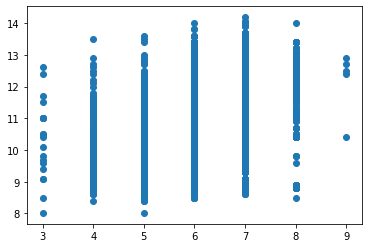

In [42]:
#Task_1_d
x=np.array(dataset['quality'])
y=np.array(dataset['alcohol'])
plt.scatter(x,y)
plt.show()